# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('new_churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
1,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
2,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
3,3120,1,32.0,R,5,3,111,5,0,227,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
4,41406,0,21.0,na,0,0,4,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18965 entries, 0 to 18964
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     18965 non-null  int64  
 1   churn                    18965 non-null  int64  
 2   age                      18965 non-null  float64
 3   housing                  18965 non-null  object 
 4   deposits                 18965 non-null  int64  
 5   withdrawal               18965 non-null  int64  
 6   purchases_partners       18965 non-null  int64  
 7   purchases                18965 non-null  int64  
 8   cc_taken                 18965 non-null  int64  
 9   cc_recommended           18965 non-null  int64  
 10  cc_disliked              18965 non-null  int64  
 11  cc_liked                 18965 non-null  int64  
 12  cc_application_begin     18965 non-null  int64  
 13  app_downloaded           18965 non-null  int64  
 14  web_user              

In [5]:
dataset.describe()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,...,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000
mean,31973.527867,0.411495,32.245821,4.237174,0.381018,33.614079,4.151701,0.089586,112.085051,0.060374,...,0.603216,0.475508,0.000949,0.020090,0.020828,0.004271,0.176378,0.020617,1.062172,0.370577
std,19306.302018,0.492117,9.585729,10.267199,1.183287,45.729559,10.068324,0.488898,89.489034,0.832904,...,0.489243,0.960402,0.030794,0.140311,0.142811,0.065215,0.381151,0.142102,0.741161,0.482972
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15345.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,0.000000
50%,31104.000000,0.000000,30.000000,0.000000,0.000000,16.000000,0.000000,0.000000,97.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970000,0.000000
75%,48068.000000,1.000000,37.000000,2.000000,0.000000,53.000000,2.000000,0.000000,186.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,1.000000
max,69651.000000,1.000000,89.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Data Pre-Processing

In [6]:
user_identifier = dataset['user']
user_identifier

0        23547
1        58313
2         8095
3         3120
4        41406
         ...  
18960    41813
18961    49903
18962    24291
18963    47663
18964    52752
Name: user, Length: 18965, dtype: int64

In [7]:
dataset = dataset.drop(columns = ['user'])
dataset

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
1,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
2,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
3,1,32.0,R,5,3,111,5,0,227,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
4,0,21.0,na,0,0,4,0,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18960,0,29.0,na,1,1,5,1,0,5,0,...,Bi-Weekly,0,0,0,0,Scorpio,1,0,0.03,0
18961,1,28.0,R,0,0,26,0,0,31,0,...,Monthly,0,0,0,0,Virgo,0,0,0.60,0
18962,1,24.0,R,0,0,0,0,0,81,0,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
18963,1,46.0,na,2,0,16,2,0,58,0,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


In [8]:
# One-Hot Encoding
dataset.housing.value_counts()

R     9221
na    7910
O     1834
Name: housing, dtype: int64

In [9]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [10]:
dataset = pd.get_dummies(dataset)

In [11]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [12]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [13]:
dataset.shape

(18965, 42)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [15]:
# Balancing the Training Set
y_train.value_counts()

0    8934
1    6238
Name: churn, dtype: int64

In [16]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [17]:
pos_index

Int64Index([12462, 11435, 14021, 18149, 12266,  8787,  2696,  3261,  7099,
            17719,
            ...
              797, 15186,  2496,  5072,  2163,  2897, 10327, 17089,  6744,
            15832],
           dtype='int64', length=6238)

In [18]:
neg_index

Int64Index([ 7624,  6666,   538,  3319, 12870,  3705, 10999, 14731,  3160,
             5540,
            ...
            18606, 14650, 15430, 14935, 14116,  9225, 13123,  9845, 10799,
             2732],
           dtype='int64', length=8934)

In [19]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [20]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
higher

array([ 4515,  2255,  6247, ...,  2977,  6506, 13661], dtype=int64)

In [21]:
len(higher)

6238

In [22]:
lower = np.asarray(lower)
lower

array([12462, 11435, 14021, ..., 17089,  6744, 15832], dtype=int64)

In [23]:
len(lower)

6238

In [24]:
new_indexes = np.concatenate((lower, higher))
new_indexes

array([12462, 11435, 14021, ...,  2977,  6506, 13661], dtype=int64)

In [25]:
len(new_indexes)

12476

In [26]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [27]:
X_train.shape

(12476, 41)

In [28]:
y_train.shape

(12476,)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# Model Building

In [30]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [32]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[1260,  967],
       [ 392, 1174]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

0.6417084102293699

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      2227
           1       0.55      0.75      0.63      1566

    accuracy                           0.64      3793
   macro avg       0.66      0.66      0.64      3793
weighted avg       0.67      0.64      0.64      3793



Test Data Accuracy: 0.6417


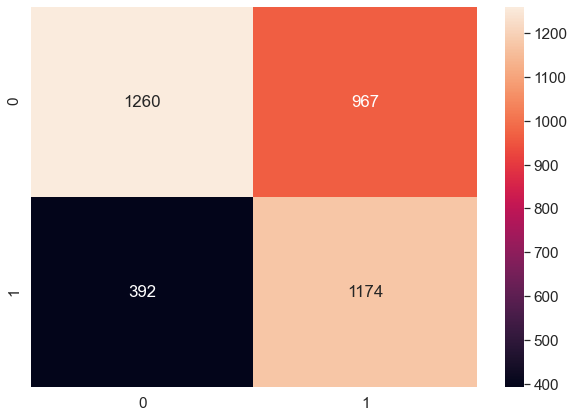

In [35]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [36]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression accuracy: 0.655 (+/- 0.024)


In [37]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.159950
1,deposits,0.300291
2,withdrawal,0.032328
3,purchases_partners,-0.752268
4,purchases,-0.437062
5,cc_taken,0.096345
6,cc_recommended,0.017384
7,cc_disliked,-0.023174
8,cc_liked,-0.025732
9,cc_application_begin,0.043065


# Feature Selection

In [38]:
## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [39]:
# Model to Test
classifier = LogisticRegression()
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

In [40]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False False False  True  True  True
  True  True  True False  True  True  True False False  True  True  True
 False  True False False  True False False False  True False False False
 False False False False False]
[ 1  1  8  1  1  1 16 14 12  1  1  1  1  1  1  9  1  1  1 11  5  1  1  1
  4  1  7  2  1 13 21 17  1  6 20 15  3 10 22 18 19]


In [41]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'reward_rate', 'is_referred', 'housing_O',
       'payment_type_Bi-Weekly', 'payment_type_Weekly',
       'zodiac_sign_Capricorn'],
      dtype='object')

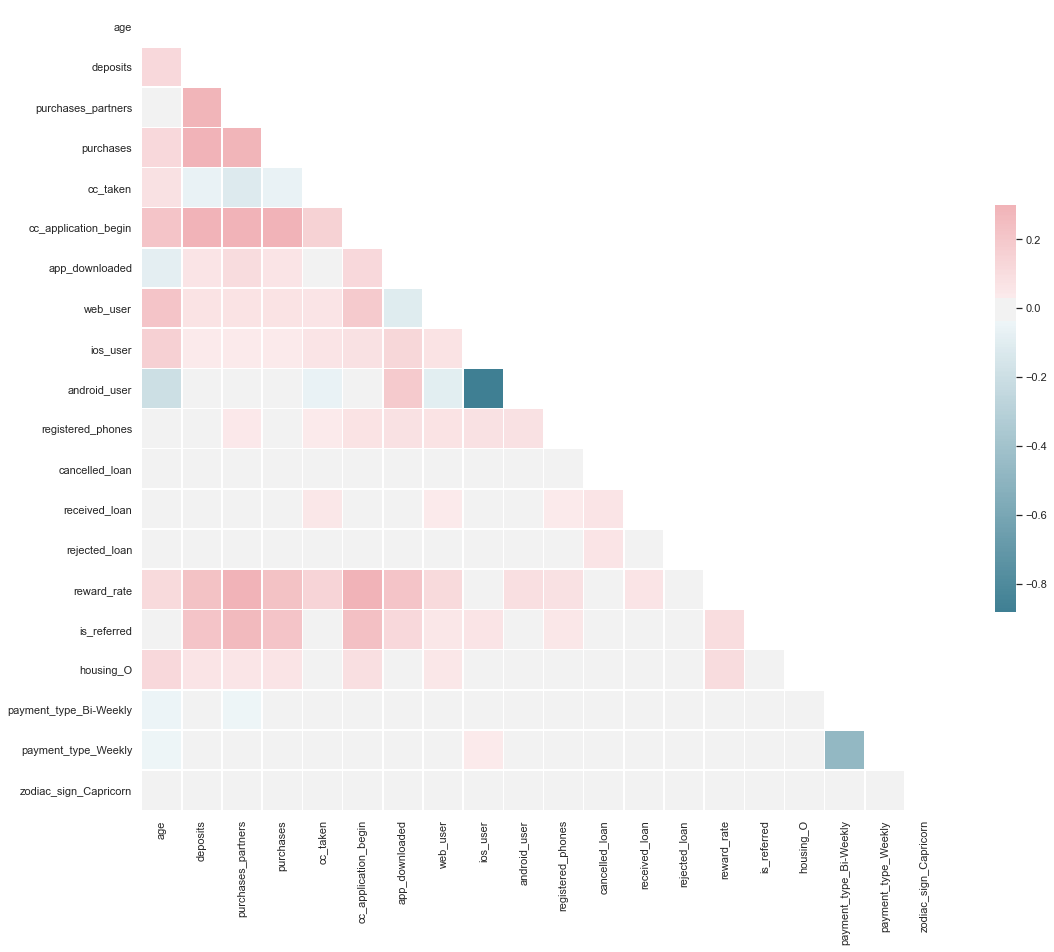

In [42]:
# New Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1258,  969],
       [ 382, 1184]], dtype=int64)

In [46]:
accuracy_score(y_test, y_pred)

0.6438175586606908

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65      2227
           1       0.55      0.76      0.64      1566

    accuracy                           0.64      3793
   macro avg       0.66      0.66      0.64      3793
weighted avg       0.68      0.64      0.64      3793



Test Data Accuracy: 0.6438


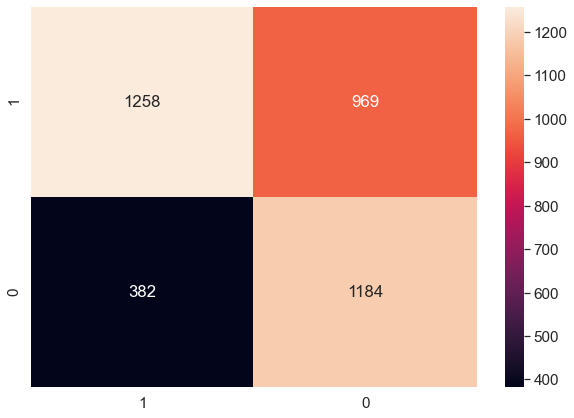

In [48]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [49]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("Logistic Regression Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Accuracy: 0.654 (+/- 0.022)


In [50]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.162644
1,deposits,0.309824
2,purchases_partners,-0.732741
3,purchases,-0.427491
4,cc_taken,0.094146
5,cc_application_begin,0.052191
6,app_downloaded,-0.080482
7,web_user,0.151815
8,ios_user,0.148370
9,android_user,0.052900


In [51]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results

,churn,user
8,0.0,20839
12,1.0,15359
16,1.0,34210
18,1.0,57608
33,0.0,11790
...,...,...
18936,0.0,67681
18941,1.0,49145
18949,0.0,47206
18955,0.0,22377


In [52]:
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [53]:
final_results

,user,churn,predicted_churn
0,20839,0.0,1
1,15359,1.0,0
2,34210,1.0,0
3,57608,1.0,1
4,11790,0.0,0
...,...,...,...
3788,67681,0.0,1
3789,49145,1.0,0
3790,47206,0.0,0
3791,22377,0.0,0


# CONCLUSION

- Our model has provided us with an indication of which users are likely to churn. We have purposefully
  left the date of the expected churn open-ended because we are focused on only gauging the features
  that indicate disengagement with the product, and not the exact manner (like timeframe) in which
  users will disengage. In this case study we have chosen this open-ended emphasis to get a sense of
  those who are even just a bit likely to churn because we are not aiming to create new products for
  people who are going to leave us for sure, but for people who are starting to lose interest in the app.
  
  
- If, after creating new product features, we start seeing our model predict that less of our users are
  going to churn, then we can assume our customers are feeling more engaged with what we are
  offering them. We can move forward with these efforts by inquiring the opinions of our users about
  our new features (eg. polls). If we want to transition into predicting churn more accurately, in order to
  put emphasis strictly on those leaving us, then we can add a time dimension to churn, which would
  add more accuracy to our model.